#   타이타닉  생존자 분류모델의 성능 측정

* 분류 모델의 여러 성능을 측정하는 get_clf_eval 함수작성

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)    ## https://leedakyeong.tistory.com/entry/%EB%B6%84%EB%A5%98-%EB%AA%A8%EB%8D%B8-%EC%84%B1%EB%8A%A5-%ED%8F%89%EA%B0%80-%EC%A7%80%ED%91%9C-Confusion-Matrix%EB%9E%80-%EC%A0%95%ED%99%95%EB%8F%84Accuracy-%EC%A0%95%EB%B0%80%EB%8F%84Precision-%EC%9E%AC%ED%98%84%EB%8F%84Recall-F1-Score
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)

    print("Confusion Matrixs")
    print(confusion)
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f}'.format(accuracy, precision, recall))

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split


df_titanic = pd.read_csv(r'D:\대학원_데이터사이언스\스터디\주말 머신러닝 스터디\강의 자료\titanic.csv') 
# df_titanic = pd.read_csv('/content/titanic.csv')  ## 코렙에서 가져올때

In [58]:
# 변수별 결측값, 타입 확인
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [59]:
## 간단한 전처리 과정 
# Parch : 함께 탑승한 부모 또는 자녀의 수

# 필요 없는 변수 제거
features_drop = ['Name', 'Ticket', 'Cabin', 'Parch']
df_titanic = df_titanic.drop(features_drop, axis=1)

# 결측치 제거
df_titanic = df_titanic[df_titanic["Age"].notna()]

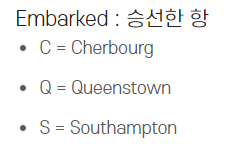

In [60]:
# 승선지 변수 개수 파악
df_titanic['Embarked'].value_counts()

S    554
C    130
Q     28
Name: Embarked, dtype: int64

In [61]:
df_titanic['Embarked'].mode()[0]  ## 최빈값 출력 함수

'S'

In [62]:
df_titanic['Embarked'].mode()   ## 최빈값 출력 함수

0    S
dtype: object

In [63]:
a_df = pd.DataFrame({'a':[1,2,3,1,2,3]})

a_df.mode() ## 최빈값이 복수일때는 모두 출력됨



,a
0,1
1,2
2,3


In [64]:
# 승선지 변수는 최빈값으로 대체
# fillna( ) 함수를 이용하여 결측치를 특정 값으로 대체
df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0], inplace = True)

In [65]:
df_titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,1,0,3,male,22.0,1,7.2500,S
1,2,1,1,female,38.0,1,71.2833,C
2,3,1,3,female,26.0,0,7.9250,S
3,4,1,1,female,35.0,1,53.1000,S
4,5,0,3,male,35.0,0,8.0500,S


In [66]:
# map 함수를 이용하여 인코딩 진행
df_titanic["Sex"] = df_titanic['Sex'].map({'female':0, 'male':1})          ## map 함수는 변환값으로 열을 추가하는게 아니라, 치환하는 방식
df_titanic["Embarked"] =df_titanic['Embarked'].map({'C':0, 'Q':1, 'S':2})  ## 총 컬럼 개수는 그대로

In [67]:
df_titanic.head()        ## 값들이 바뀌어 있음 (총 컬럼 개수는 그대로)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,1,0,3,1,22.0,1,7.2500,2
1,2,1,1,0,38.0,1,71.2833,0
2,3,1,3,0,26.0,0,7.9250,2
3,4,1,1,0,35.0,1,53.1000,2
4,5,0,3,1,35.0,0,8.0500,2


* 타이타닉 데이터 데이터 분할

In [68]:
# y 변수(결과)만 추출 
df_y = df_titanic['Survived'].copy()          ### 0이 미생존,    1이 생존

# y변수 제거
df_x = df_titanic.drop('Survived', axis=1).copy()

# 훈련 데이터와 테스트 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=11)

In [69]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Sex          714 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        714 non-null    int64  
 6   Fare         714 non-null    float64
 7   Embarked     714 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 50.2 KB


* LogisticRegression 모델을 이용하여 타이타닉 생존자 분류 모델 학습
* get_clf_eval() 함수를 이용하여 성능 측정

In [71]:
from sklearn.linear_model import LogisticRegression

# 모델 객체 생성
lr_clf = LogisticRegression()

# 학습
lr_clf.fit(x_train, y_train)

# 학습된 모델에 test 데이터를 통해 예측 값 추출
pred = lr_clf.predict(x_test)

# 성능 측정
get_clf_eval(y_test, pred)

Confusion Matrixs
[[68 17]
 [20 38]]
Accuracy: 0.7413, Precision: 0.6909, Recall: 0.6552


C:\user_LKH\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Confusion Matirx

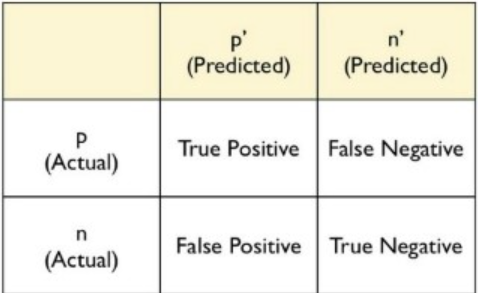

In [ ]:
df_titanic.info()

# precision_recall_curve()  API
* precision_ recall_curve() API를 이용한 Trade-Off 관계 시각화
* precision : 모델 입장에서의 정답율.    모델이 True라고 했을때, 진짜 사건이 True였을 확률
* recall : 실제 사건 입장에서의 정답율.    실제 사건이 True라고 했을때, 모델이 True라고 한 확률

# 임계값 한개에 대해 이분화 가능할때 사용하기 좋음

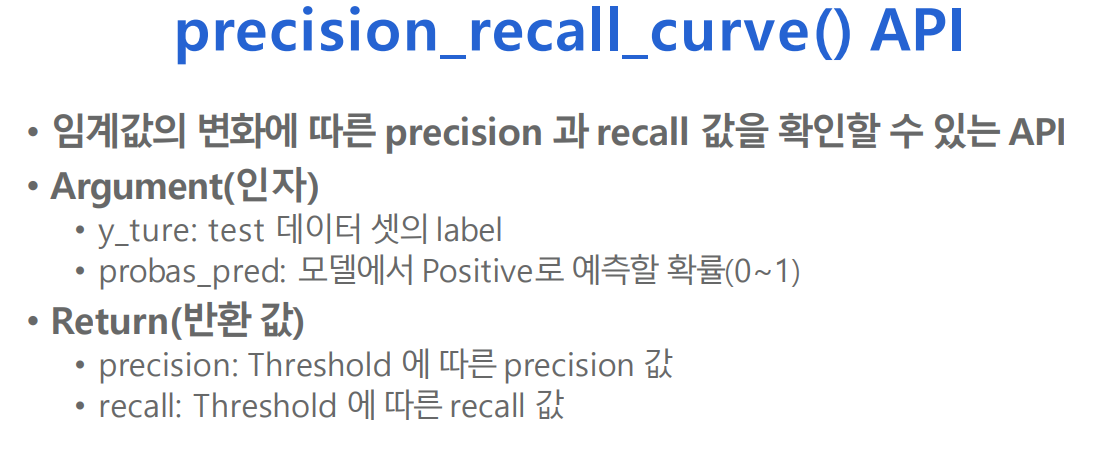

In [73]:
##  predict_proba 함수  :  분류에 대한 확률을 표현함 ( 여기서는 non-survived / survived 확률을 표현함)

pred_proba = lr_clf.predict_proba(x_test)
pred_proba

array([[0.04019225, 0.95980775],
       [0.084322  , 0.915678  ],
       [0.89987392, 0.10012608],
       [0.03097903, 0.96902097],
       [0.69145767, 0.30854233],
       [0.10639149, 0.89360851],
       [0.63861148, 0.36138852],
       [0.89938212, 0.10061788],
       [0.57932892, 0.42067108],
       [0.44935055, 0.55064945],
       [0.52069554, 0.47930446],
       [0.86599844, 0.13400156],
       [0.86294591, 0.13705409],
       [0.45677572, 0.54322428],
       [0.78955569, 0.21044431],
       [0.07361417, 0.92638583],
       [0.27373532, 0.72626468],
       [0.59508251, 0.40491749],
       [0.89234014, 0.10765986],
       [0.74152631, 0.25847369],
       [0.69445426, 0.30554574],
       [0.93991514, 0.06008486],
       [0.89586653, 0.10413347],
       [0.18424196, 0.81575804],
       [0.85172546, 0.14827454],
       [0.87937779, 0.12062221],
       [0.90781573, 0.09218427],
       [0.82764109, 0.17235891],
       [0.11682791, 0.88317209],
       [0.85657325, 0.14342675],
       [0.

In [99]:
## predict   :  확률을 통해서 선택된 결과값을 출력함
pred = lr_clf.predict(x_test)
pred   

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [100]:
# 학습된 분류모델(lr_clf)에서 생존 클래스에 해당하는 확률값 예측
# precision_recall_curve API를 이용해 임계값에 따른 precision, recall 생성
from sklearn.metrics import precision_recall_curve
import numpy as np

# predict_proba의 출력은 항상 0과 1 사이의 값이며 두 클래스에 대한 확률의 합은 항상 1
pred_proba = lr_clf.predict_proba(x_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)

print('Shape of threshold List:', thresholds.shape )
print(thresholds )


thr_index = np.arange(0, thresholds.shape[0], 5)

Shape of threshold List: (2,)
[0 1]


In [82]:
print( precisions, recalls, thresholds, sep='\n\n', end ='\n\n')
print( precisions.shape)

[0.41428571 0.41007194 0.41304348 0.41605839 0.41911765 0.42222222
 0.42537313 0.42105263 0.42424242 0.42748092 0.43076923 0.43410853
 0.4375     0.44094488 0.43650794 0.44       0.44354839 0.44715447
 0.45081967 0.45454545 0.45       0.45378151 0.45762712 0.46153846
 0.46551724 0.46956522 0.47368421 0.47787611 0.48214286 0.48648649
 0.49090909 0.49541284 0.5        0.5046729  0.5        0.5047619
 0.5        0.50485437 0.50980392 0.51485149 0.52       0.52525253
 0.53061224 0.53608247 0.53125    0.53684211 0.54255319 0.5483871
 0.55434783 0.56043956 0.55555556 0.56179775 0.56818182 0.57471264
 0.58139535 0.58823529 0.5952381  0.60240964 0.6097561  0.61728395
 0.6125     0.62025316 0.62820513 0.63636364 0.63157895 0.64
 0.64864865 0.65753425 0.66666667 0.66197183 0.67142857 0.66666667
 0.66176471 0.65671642 0.65151515 0.64615385 0.65625    0.65079365
 0.64516129 0.63934426 0.65       0.6440678  0.65517241 0.66666667
 0.67857143 0.69090909 0.7037037  0.71698113 0.71153846 0.7254902
 0.7

In [65]:
# 임계값의 변화에 따른 precision, recall 값 출력

print('Sample Threshold Index:', thr_index)
print('Sample Threshold Value: ', np.round(thresholds[thr_index], 2))
print('Sample Threshold Precision: ', np.round(precisions[thr_index], 3))
print('Sample Threshold Recall: ', np.round(recalls[thr_index], 3))

Sample Threshold Index: [  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135]
Sample Threshold Value:  [0.05 0.07 0.08 0.09 0.1  0.1  0.12 0.13 0.14 0.16 0.17 0.2  0.26 0.31
 0.35 0.43 0.48 0.53 0.55 0.61 0.68 0.71 0.73 0.81 0.85 0.89 0.91 0.93]
Sample Threshold Precision:  [0.414 0.422 0.431 0.44  0.45  0.47  0.491 0.505 0.52  0.537 0.556 0.588
 0.612 0.64  0.671 0.646 0.65  0.691 0.72  0.756 0.8   0.829 0.867 0.88
 0.95  0.933 0.9   0.8  ]
Sample Threshold Recall:  [1.    0.983 0.966 0.948 0.931 0.931 0.931 0.914 0.897 0.879 0.862 0.862
 0.845 0.828 0.81  0.724 0.672 0.655 0.621 0.586 0.552 0.5   0.448 0.379
 0.328 0.241 0.155 0.069]


In [66]:
# 임계값의 변화에 따른 precision, recall 값의 차트를 그리는 함수 작성
import matplotlib.pyplot as plt

def precision_recall_curve_plot(y_test , pred_proba):
  precisions, recalls, thres = precision_recall_curve(y_test, pred_proba) 
  thres_cnt = thres.shape[0]
  
  plt.figure(figsize=(8,6))
  
  plt.plot(thres, precisions[0:thres_cnt], linestyle='--', label='precision') 
  plt.plot(thres, recalls[0:thres_cnt], label='recall') 
  plt.xlabel('Threshol d')
  plt.ylabel('Precision and Recall')
  plt.legend()
  plt.show()

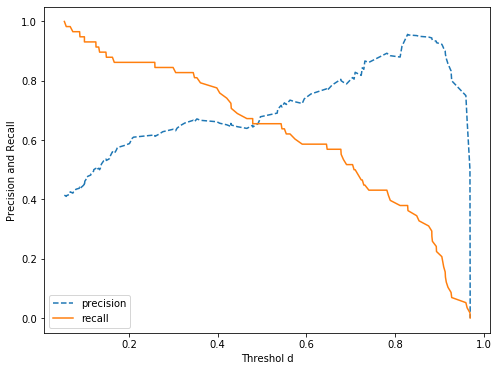

In [67]:
# precision_recall_curve_plot 함수를 이용해 precision 과 recall 간의 Trade-off 관계 시각화
precision_recall_curve_plot( y_test, lr_clf.predict_proba(x_test)[:, 1] )

# f1_score() API
* f1_score() API를 활용한 성능 지표 확인

In [112]:
# 앞서 정의한 성능측정 함수(get_clf_eval)에 f1 score 계산 코드 추가
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix(y_test, pred) 
    accuracy = accuracy_score(y_test , pred) 
    precision = precision_score(y_test , pred) 
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test, pred)

    print('Confusion Matrixs') 
    print(confusion)
    print('Accuracy:{0:.4f}, Precision:{1:.4f}, Recall:{2:.4f}, F1:{3:.4f}' .format(accuracy , precision ,recall, f1))

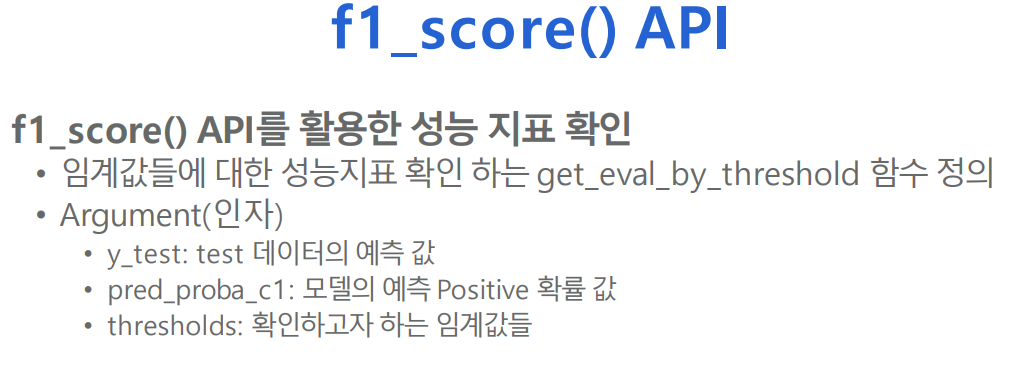

In [131]:
from sklearn.preprocessing import Binarizer 

## Binarizer() API
## 사용자가 입력한 Threshold 값을 기준으로 하여 예측 값을 [0 or 1] 으로 출력
## 임계 값보다 큰 값은 1에 매핑되고 임계 값보다 작거나 같은 값은 0에 매핑, 기본 임계 값이 0이면 양수 값만 1에 매핑

X = [[ 1, -1, 2],[ 2, 0, 0], [ 0, 1.1, 1.2]]

binarizer = Binarizer(threshold=1.1) 

print(binarizer.fit_transform(X))     ##  위 아래 똑같음
 
print(binarizer.fit(X).transform(X))  ##  위 아래 똑같음

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [127]:
# 임계값(thresholds)을 기준으로 분류 결과를 생성해 성능지표를 계산하는 함수
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba) 
        custom_predict = binarizer.transform(pred_proba)           ## Binarizer의 결과물 (0 또는 1로 구성됨)

        print('Threshod:',custom_threshold) 
        get_clf_eval(y_test , custom_predict)

In [139]:
# 모델의 분류예측 값과 임계값을 get_eval_by_threshold 함수에 전달
pred_proba = lr_clf.predict_proba(x_test)
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds## pred_proba[:,1].reshape(-1,1)를 통해 n rows X 1 cols 로 변경


Threshod: 0.4
Confusion Matrixs
[[62 23]
 [14 44]]
Accuracy:0.7413, Precision:0.6567, Recall:0.7586, F1:0.7040
Threshod: 0.45
Confusion Matrixs
[[63 22]
 [19 39]]
Accuracy:0.7133, Precision:0.6393, Recall:0.6724, F1:0.6555
Threshod: 0.5
Confusion Matrixs
[[68 17]
 [20 38]]
Accuracy:0.7413, Precision:0.6909, Recall:0.6552, F1:0.6726
Threshod: 0.55
Confusion Matrixs
[[71 14]
 [21 37]]
Accuracy:0.7552, Precision:0.7255, Recall:0.6379, F1:0.6789
Threshod: 0.6
Confusion Matrixs
[[74 11]
 [24 34]]
Accuracy:0.7552, Precision:0.7556, Recall:0.5862, F1:0.6602


In [140]:
pred_proba[:,1].reshape(-1,1)

array([[0.95980775],
       [0.915678  ],
       [0.10012608],
       [0.96902097],
       [0.30854233],
       [0.89360851],
       [0.36138852],
       [0.10061788],
       [0.42067108],
       [0.55064945],
       [0.47930446],
       [0.13400156],
       [0.13705409],
       [0.54322428],
       [0.21044431],
       [0.92638583],
       [0.72626468],
       [0.40491749],
       [0.10765986],
       [0.25847369],
       [0.30554574],
       [0.06008486],
       [0.10413347],
       [0.81575804],
       [0.14827454],
       [0.12062221],
       [0.09218427],
       [0.17235891],
       [0.88317209],
       [0.14342675],
       [0.7817033 ],
       [0.34799932],
       [0.69078482],
       [0.87584731],
       [0.13853978],
       [0.85426059],
       [0.7851108 ],
       [0.70774212],
       [0.73209302],
       [0.84894712],
       [0.10400201],
       [0.14082138],
       [0.17401589],
       [0.09933874],
       [0.89308717],
       [0.67865895],
       [0.81154593],
       [0.345

In [110]:
import numpy as np
from sklearn.metrics import precision_recall_curve
y_true = np.array([0, 0, 0, 1, 1, 1])
y_scores = np.array([0.2, 0.36, 0.4, 0.35, 0.8, 0.7])
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
print(precision, recall, thresholds)

[0.6        0.5        0.66666667 1.         1.         1.        ] [1.         0.66666667 0.66666667 0.66666667 0.33333333 0.        ] [0.35 0.36 0.4  0.7  0.8 ]


# 회귀(Regression 모델) Metric

https://www.marinedatascience.co/blog/2019/01/07/normalizing-the-rmse/

# RMSE

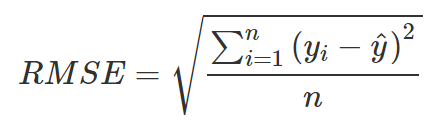

# NRMSE   :   주로, RMSE / 표준편차가 일반적임

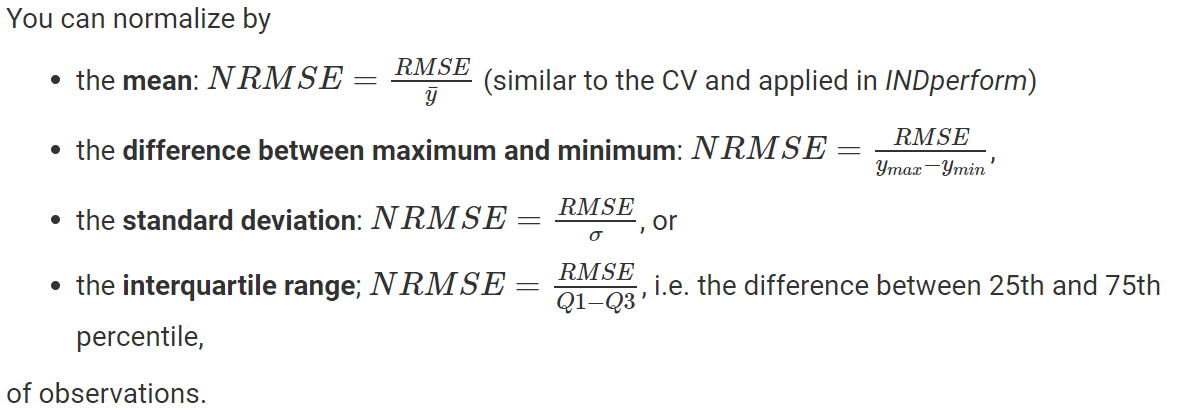
